# Actividad - Ecuaciones diferenciales

1. Resolver numéricamente con `solve_ivp` la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [81]:
import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
# dx/dt = x/t+1
# dx/x = dt/t+1
# ln(x) = ln(t+1)
# x = t + 1

def uno(t):
    x = t + 1
    return x

def f1(x,t):
    return x/(t+1)

In [83]:
solve_ivp?

In [84]:
tspan = [0,50]
x0 = np.array([0.2])
t = np.linspace(0, 50, 500)
fulanito = solve_ivp(f1, tspan, x0)

In [85]:
fulanito

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 62
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
       1.11100000e-01, 1.11110000e+00, 2.70478241e+00, 5.85253591e+00,
       1.43493853e+01, 4.18531167e+01, 5.00000000e+01])
 t_events: None
        y: array([[ 0.2       ,  0.2       ,  0.2000005 ,  0.20005134,  0.20513203,
         0.6353817 ,  1.95826135,  4.97363089, 13.39902324, 40.87010559,
        49.01422159]])
 y_events: None

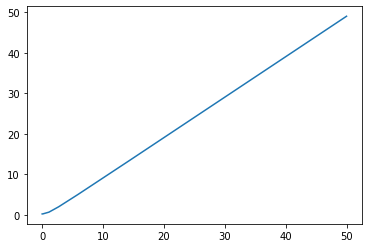

In [86]:
plt.figure()
plt.plot(fulanito.t, fulanito.y[0, :])

In [87]:
fulanito.t.shape

(11,)

In [88]:
fulanito.y[0, :].shape

(11,)

Grafique con condición inicial $x_0 = 2$

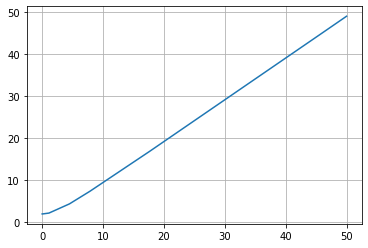

In [89]:
x0 = np.array([2])
fulanito = solve_ivp(f1, tspan, x0)
plt.figure()
plt.grid()
plt.plot(fulanito.t, fulanito.y[0, :])

2. Encuentre la solución numérica para un oscilador armónico simple:

$$
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x = 0.
$$
Donde $x_0=0.5$, $\dot{x}_0=0.1$ y $\omega_0=3$.

2.1 Defina una función, cuyos argumentos de entrada sean:


1. el tiempo $t$,
2. el arreglo $[x,\dot{x}]$.

Y la salida:

1. el arreglo $[\dot{x},\ddot{x}]$.

  Considerando el argumento de la frecuencia natural $\omega_0$ debe ser una variable global.

In [90]:
solve_ivp?

In [117]:
w0 = 3
t = np.linspace(0, 50, 500)
tspam = [0,50]

def dX(t,X):
    #X es un arreglo [x,x']
    return(X[1], -w0**2*X[0])

x3 = solve_ivp(dX,tspam,np.asarray([0.5,0.1]))

In [118]:
# x0 = np.array([0.5])
# x01 = np.array([0.1])
w0 = np.array([3])

Grafique

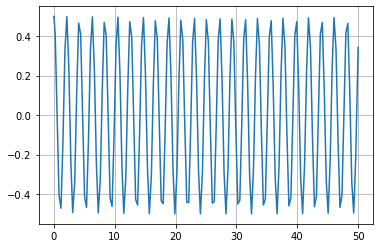

In [119]:
x3y = x3.y[0,:]

plt.figure()
plt.plot(x3.t,x3y)
plt.grid()

Asigne a los parámetros de la solución analítica $C_1=x_0$ y $C_2=\frac{\dot{x}_0}{\omega_0}$.

In [120]:
def sol(t, x0):
    C1 = x0
    C2 = x0/w0
    return C1*np.cos(w0*t) + C2*np.sin(w0*t)

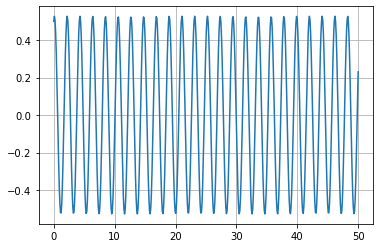

In [121]:
t = np.linspace(0,50,500)
x0 = 0.5
plt.figure()
plt.plot(t, sol(t,x0))
plt.grid()

Redefina la función para graficarla (con la palabra reservada ***def***) en un intervalo de tiempo de 0 a 10 segundos. Comparela en un mismo grafico con la solución numérica obtenida.

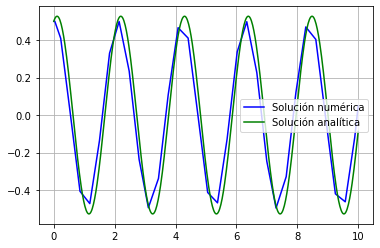

In [126]:
t = np.linspace(0,10,500)

x2 = solve_ivp(dX,[0,10],np.asarray([0.5,0.1]))
x2y = x2.y[0,:]

plt.figure()
plt.plot(x2.t,x2y,'b',label="Solución numérica")
plt.plot(t, sol(t,x0), 'g', label="Solución analítica")
plt.legend()
plt.grid()